In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## to read the string, you need an 'r' in front of the location
Data = pd.read_csv(r'C:\Users\18369\Desktop\SelectionDay\german_credit.csv')
print(Data.columns)
Data.head(10)

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [3]:
import scipy.stats
import random

In [4]:
print ('Number of observations: ', len(Data))

Number of observations:  1000


In [5]:
## check if there are missing values, here is no
Data.apply(lambda x: x.count(), axis=0)

Creditability                        1000
Account Balance                      1000
Duration of Credit (month)           1000
Payment Status of Previous Credit    1000
Purpose                              1000
Credit Amount                        1000
Value Savings/Stocks                 1000
Length of current employment         1000
Instalment per cent                  1000
Sex & Marital Status                 1000
Guarantors                           1000
Duration in Current address          1000
Most valuable available asset        1000
Age (years)                          1000
Concurrent Credits                   1000
Type of apartment                    1000
No of Credits at this Bank           1000
Occupation                           1000
No of dependents                     1000
Telephone                            1000
Foreign Worker                       1000
dtype: int64

In [46]:
#from sklearn import model_selection, preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from patsy import dmatrices
## alternative to C_Validation
from sklearn.model_selection import train_test_split

In [6]:
## check the unique value
Data.Creditability.unique()

array([1, 0], dtype=int64)

In [7]:
### Unique values for each column
for col in Data:
    print (col, ":", Data[col].unique())

Creditability : [1 0]
Account Balance : [1 2 4 3]
Duration of Credit (month) : [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
Payment Status of Previous Credit : [4 2 3 0 1]
Purpose : [ 2  0  9  3  1 10  5  4  6  8]
Credit Amount : [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284  1567  2032  2745  1867
  2299   929  3399  2030  3275  1940  1602  1979  2022  3342  5866  2360
  1520  3651  2346  4454   666  1965  1995  2991  4221  1364  6361  4526
  3573  4455  2136  5954  3777   806  4712  7432  1851  1393  1412  1473
  1533  2012  3959   428  2366   763  3976  6260  1919  

In [8]:
print("Creditability numbers: ")
Data["Creditability"].value_counts()

Creditability numbers: 


1    700
0    300
Name: Creditability, dtype: int64

In [11]:
Data[Data['Credit Amount']>=12000]

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
179,1,4,48,3,3,12749,3,4,4,3,...,1,3,37,3,2,1,4,1,2,1
208,1,2,48,1,0,12169,5,1,4,3,...,4,4,36,3,3,1,4,1,2,1
382,1,4,60,4,0,13756,5,5,2,3,...,4,4,63,1,3,1,4,1,2,1
442,1,1,39,4,2,14179,5,4,4,3,...,4,2,30,3,2,2,4,1,2,1
575,1,2,48,0,9,12204,5,3,2,3,...,2,3,48,1,2,1,4,1,2,1
645,1,1,36,2,10,15857,1,1,2,1,...,3,3,43,3,2,1,4,1,1,1
695,1,4,60,3,3,15653,1,4,2,3,...,4,3,21,3,2,2,3,1,2,1
754,0,2,6,2,0,14555,5,1,1,3,...,2,2,23,3,2,1,1,1,2,1
782,0,2,36,2,0,14318,1,5,4,3,...,2,4,57,3,3,1,4,1,2,1
810,0,2,48,2,9,15672,1,3,2,3,...,2,3,23,3,2,1,3,1,2,1


In [16]:
Data[Data['Age (years)'] <50]

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,1,12,0,3,6199,1,3,4,3,...,2,2,28,3,1,2,3,1,2,1
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1


In [19]:
Data[Data['Duration of Credit (month)']> 50]

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
241,1,4,60,2,0,10366,1,5,2,3,...,4,2,42,3,2,1,4,1,2,1
309,1,4,54,0,1,9436,5,3,2,3,...,2,2,39,3,2,1,2,2,1,1
382,1,4,60,4,0,13756,5,5,2,3,...,4,4,63,1,3,1,4,1,2,1
455,1,2,60,3,3,7418,5,3,1,3,...,1,1,27,3,2,1,2,1,1,1
562,0,2,60,2,0,7408,2,2,4,2,...,2,2,24,3,2,1,4,1,1,1
690,1,4,60,2,3,10144,2,4,2,2,...,4,1,21,3,2,1,3,1,2,1
695,1,4,60,3,3,15653,1,4,2,3,...,4,3,21,3,2,2,3,1,2,1
719,0,2,72,2,3,5595,2,3,2,4,...,2,3,24,3,2,1,3,1,1,1
729,1,2,60,3,3,9157,5,3,2,3,...,2,4,27,3,3,1,4,1,1,1
731,1,4,60,2,0,6527,5,3,4,3,...,4,4,34,3,3,1,3,2,2,1


Text(0, 0.5, 'Frequency')

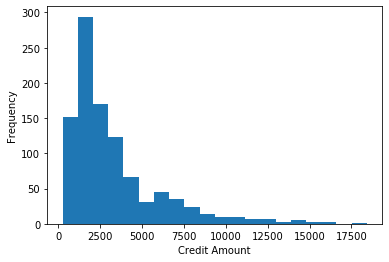

In [21]:
## Distribution of the continuous variables

plt.hist(Data['Credit Amount'],bins = 20)
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')

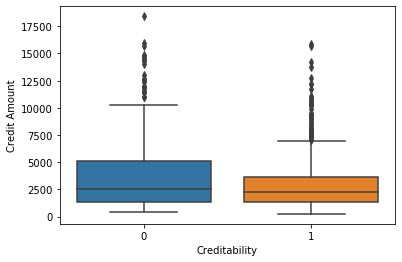

In [22]:
sns.boxplot(x=Data['Creditability'], y=Data['Credit Amount'])

Text(0, 0.5, 'Frequency')

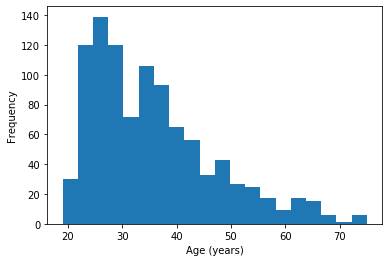

In [27]:
plt.hist(Data['Age (years)'], bins=20)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

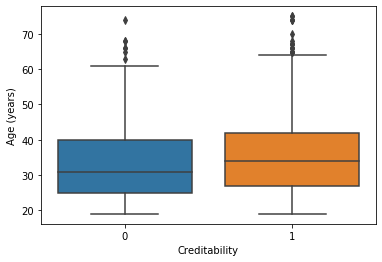

In [28]:
sns.boxplot(x=Data['Creditability'], y=Data['Age (years)'])

In [31]:
Data['Account Balance'].replace(4,3,inplace = True)
Data["Payment Status of Previous Credit"].replace(0, 1, inplace = True)
Data["Payment Status of Previous Credit"].replace(4, 3, inplace = True)
Data["Value Savings/Stocks"].replace(4, 3, inplace = True)
Data["Value Savings/Stocks"].replace(5, 4, inplace = True)
Data["Length of current employment"].replace(2, 1, inplace = True)
Data["Length of current employment"].replace(3, 2, inplace = True)

Data["Length of current employment"].replace(4, 3, inplace = True)
Data["Length of current employment"].replace(5, 4, inplace = True)
Data["Occupation"].replace(2, 1, inplace = True)
Data["Occupation"].replace(3, 2, inplace = True)
Data["Occupation"].replace(4, 3, inplace = True)

Data["Sex & Marital Status"].replace(2, 1, inplace = True)
Data["Sex & Marital Status"].replace(3, 2, inplace = True)
Data["Sex & Marital Status"].replace(4, 3, inplace = True)

Data["No of Credits at this Bank"].replace(3, 2, inplace = True)
Data["No of Credits at this Bank"].replace(4, 2, inplace = True)
Data["Guarantors"].replace(3, 2, inplace = True)
Data["Concurrent Credits"].replace(2, 1, inplace = True)
Data["Concurrent Credits"].replace(3, 2, inplace = True)
Data["Purpose"].replace([3,4,5], 2, inplace = True)
Data["Purpose"].replace([6,7,8,9,10], 3, inplace = True)


In [32]:
Data.head(17)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,2,1,1,1
1,1,1,9,3,0,2799,1,2,2,2,...,2,1,36,2,1,2,2,2,1,1
2,1,2,12,2,3,841,2,3,2,1,...,4,1,23,2,1,1,1,1,1,1
3,1,1,12,3,0,2122,1,2,3,2,...,2,1,39,2,1,2,1,2,1,2
4,1,1,12,3,0,2171,1,2,4,2,...,4,2,38,1,2,2,1,1,1,2
5,1,1,10,3,0,2241,1,1,1,2,...,3,1,48,2,1,2,1,2,1,2
6,1,1,8,3,0,3398,1,3,1,2,...,4,1,39,2,2,2,1,1,1,2
7,1,1,6,3,0,1361,1,1,2,2,...,4,1,40,2,2,1,1,2,1,2
8,1,3,18,3,2,1098,1,1,4,1,...,4,3,65,2,2,2,1,1,1,1
9,1,2,24,2,2,3758,3,1,1,1,...,4,4,23,2,1,1,1,1,1,1


In [34]:
category_list = ["Duration of Credit (month)", "Credit Amount", "Age (years)"]
Data_categorical = Data["Creditability"]
for col in Data:
    if col not in category_list:
        category_tab = pd.crosstab(columns = Data[col], index = "Percentage").apply(lambda r: (r/r.sum())*100, axis=1)
        category_tab.index = ["(%)"]
        print (category_tab)
        print()

Creditability     0     1
(%)            30.0  70.0

Account Balance     1     2     3
(%)              27.4  26.9  45.7

Payment Status of Previous Credit    1     2     3
(%)                                8.9  53.0  38.1

Purpose     0     1     2     3
(%)      23.4  10.3  49.5  16.8

Value Savings/Stocks     1     2     3     4
(%)                   60.3  10.3  11.1  18.3

Length of current employment     1     2     3     4
(%)                           23.4  33.9  17.4  25.3

Instalment per cent     1     2     3     4
(%)                  13.6  23.1  15.7  47.6

Sex & Marital Status     1     2    3
(%)                   36.0  54.8  9.2

Guarantors     1    2
(%)         90.7  9.3

Duration in Current address     1     2     3     4
(%)                          13.0  30.8  14.9  41.3

Most valuable available asset     1     2     3     4
(%)                            28.2  23.2  33.2  15.4

Concurrent Credits     1     2
(%)                 18.6  81.4

Type of apartment     1 

In [35]:
## Contingency table for Account Balance
acc_bal_tab1 = pd.crosstab(Data["Account Balance"], Data["Creditability"], margins = True)
acc_bal_tab1

Creditability,0,1,All
Account Balance,,,
1,135,139,274
2,105,164,269
3,60,397,457
All,300,700,1000


In [37]:
chi2, p, dof, exp = scipy.stats.chi2_contingency(acc_bal_tab1)
print (chi2)
print (p)
print (dof)
print (exp)

120.84376361168341
1.083531364440226e-23
6
[[  82.2  191.8  274. ]
 [  80.7  188.3  269. ]
 [ 137.1  319.9  457. ]
 [ 300.   700.  1000. ]]


In [38]:
### Summary Statistics for Continuous Variables

continuous_list = ["Duration of Credit (month)", "Credit Amount", "Age (years)"]
for col in continuous_list:
    continuous_summary = Data[col].describe()
    print(col)
    print(continuous_summary)

Duration of Credit (month)
count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration of Credit (month), dtype: float64
Credit Amount
count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: Credit Amount, dtype: float64
Age (years)
count    1000.00000
mean       35.54200
std        11.35267
min        19.00000
25%        27.00000
50%        33.00000
75%        42.00000
max        75.00000
Name: Age (years), dtype: float64


In [40]:
features = Data[['Account Balance',
'Payment Status of Previous Credit',
 'Purpose',
 'Value Savings/Stocks',
 'Length of current employment',
 'Most valuable available asset',
 'Concurrent Credits',
 'Type of apartment',
 'Credit Amount',
 'Duration of Credit (month)',
 'Age (years)']]

#features = np.array(features)

label = np.array(Data["Creditability"])

In [52]:
#from sklearn import model_selection, preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from patsy import dmatrices
## alternative to C_Validation
from sklearn.model_selection import train_test_split

In [54]:
## split data and test with logistic
features_train, features_test, label_train, label_test = train_test_split(features, 
                                                                          label, test_size = 0.5, random_state = 1)         

In [56]:
lrm = LogisticRegression()
lrm.fit(features_train, label_train)
print (lrm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\18369\Anaconda3\envs\FS\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
pred = lrm.predict(features_test)

In [62]:
print('Score of training data:'), lrm.score(features_train, label_train)
print('Score of testing data:'), lrm.score(features_test, label_test)

Score of training data:
Score of testing data:


(None, 0.74)

In [60]:
print('slope: '), lrm.coef_
print('intercept: '), lrm.intercept_

slope: 
intercept: 


(None, array([-0.0484209]))

In [63]:
pd.DataFrame(zip(features.columns, np.transpose(lrm.coef_)))

,0,1
0,Account Balance,[0.6161866408032708]
1,Payment Status of Previous Credit,[0.22253394112017233]
2,Purpose,[0.08811234942903767]
3,Value Savings/Stocks,[0.2528392028624475]
4,Length of current employment,[0.2589357925583187]
5,Most valuable available asset,[-0.3563524246947019]
6,Concurrent Credits,[-0.050703814138507775]
7,Type of apartment,[0.1289790699250981]
8,Credit Amount,[3.54197641588492e-05]
9,Duration of Credit (month),[-0.045772155812884234]


In [ ]:
pip install xgboost